# Importing Required Libraries

In [1]:
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to C:\Users\Abhimanyu
[nltk_data]     Singh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Abhimanyu
[nltk_data]     Singh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Loading The Dataset

In [3]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
val_df = pd.read_csv("validation.csv")

In [4]:
train_df.head()

,id,article,highlights
0,0001d1afc246a7964130f43ae940af6bc6c57f01,By . Associated Press . PUBLISHED: . 14:11 EST...,"Bishop John Folda, of North Dakota, is taking ..."
1,0002095e55fcbd3a2f366d9bf92a95433dc305ef,(CNN) -- Ralph Mata was an internal affairs li...,Criminal complaint: Cop used his role to help ...
2,00027e965c8264c35cc1bc55556db388da82b07f,A drunk driver who killed a young woman in a h...,"Craig Eccleston-Todd, 27, had drunk at least t..."
3,0002c17436637c4fe1837c935c04de47adb18e9a,(CNN) -- With a breezy sweep of his pen Presid...,Nina dos Santos says Europe must be ready to a...
4,0003ad6ef0c37534f80b55b4235108024b407f0b,Fleetwood are the only team still to have a 10...,Fleetwood top of League One after 2-0 win at S...


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287113 entries, 0 to 287112
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id          287113 non-null  object
 1   article     287113 non-null  object
 2   highlights  287113 non-null  object
dtypes: object(3)
memory usage: 6.6+ MB


In [6]:
train_df.describe()

,id,article,highlights
count,287113,287113,287113
unique,287113,284005,282197
top,0001d1afc246a7964130f43ae940af6bc6c57f01,(CNN) -- Dubai could lose its place on the Wom...,This page includes the show Transcript and the...
freq,1,3,83


# EDA and Preprocessing

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


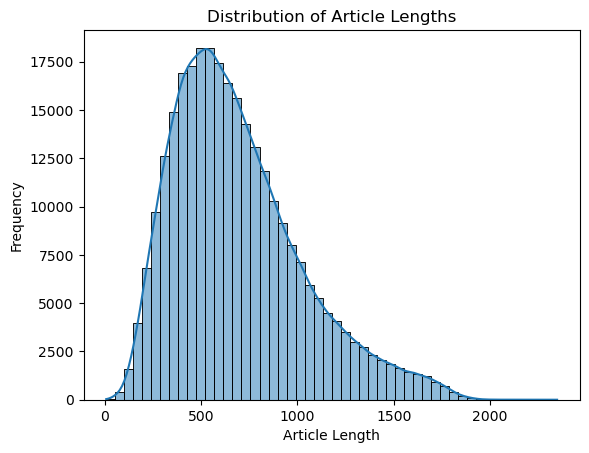

In [7]:
train_df['article_length'] = train_df['article'].apply(lambda x: len(x.split()))
sns.histplot(train_df['article_length'], bins=50, kde=True)
plt.title('Distribution of Article Lengths')
plt.xlabel('Article Length')
plt.ylabel('Frequency')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


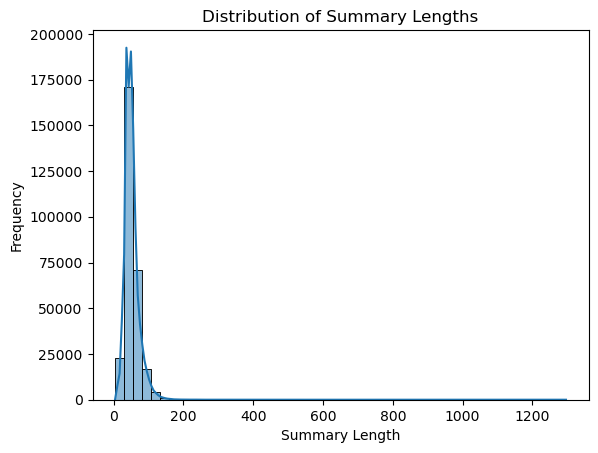

In [8]:
train_df['summary_length'] = train_df['highlights'].apply(lambda x: len(x.split()))
sns.histplot(train_df['summary_length'], bins=50, kde=True)
plt.title('Distribution of Summary Lengths')
plt.xlabel('Summary Length')
plt.ylabel('Frequency')
plt.show()

In [11]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
def preprocess(text):
    # Remove special characters, numbers, and extra spaces
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'\d+', '', text)  
    text = re.sub(r'[^\w\s]', '', text) 

    # Tokenization
    tokens = word_tokenize(text)
    # Remove stopwords
    tokens = [token for token in tokens if token.lower() not in stop_words]
    # Lemmatization
    lemmatized = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(lemmatized)

In [12]:
train_df['article'] = train_df['article'].apply(preprocess)
train_df['highlights'] = train_df['highlights'].apply(preprocess)
val_df['article'] = val_df['article'].apply(preprocess)
val_df['highlights'] = val_df['highlights'].apply(preprocess)
test_df['article'] = test_df['article'].apply(preprocess)
test_df['highlights'] = test_df['highlights'].apply(preprocess)

In [13]:
train_df.head()

,id,article,highlights,article_length,summary_length
0,0001d1afc246a7964130f43ae940af6bc6c57f01,Associated Press PUBLISHED EST October UPDATED...,Bishop John Folda North Dakota taking time dia...,198,37
1,0002095e55fcbd3a2f366d9bf92a95433dc305ef,CNN Ralph Mata internal affair lieutenant Miam...,Criminal complaint Cop used role help cocaine ...,392,38
2,00027e965c8264c35cc1bc55556db388da82b07f,drunk driver killed young woman headon crash c...,Craig EcclestonTodd drunk least three pint dri...,808,69
3,0002c17436637c4fe1837c935c04de47adb18e9a,CNN breezy sweep pen President Vladimir Putin ...,Nina do Santos say Europe must ready accept sa...,531,53
4,0003ad6ef0c37534f80b55b4235108024b407f0b,Fleetwood team still record Sky Bet League One...,Fleetwood top League One win Scunthorpe Peterb...,580,67
